In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm

# Comparaison of Euler and Runge-Kutta 4 integration techniques on a linear ODE

In [2]:
def LinearEQ(t,S,w):
    return w*S

def Euler(t,S,dt,f,w):
    return S + dt*f(t,S,w)

def RK4(t,S,dt,f,w):
    k1 = f(t,S,w)
    k2 = f(t+dt/2,S+k1*dt/2,w)
    k3 = f(t+dt/2,S+k2*dt/2,w)
    k4 = f(t+dt,S+k3*dt,w)
    return S +(dt/6)*(k1+2*k2+2*k3+k4)

In [3]:
w = -0.1+1.0j
x0 = 0.5+0.5j
dt_integration =0.01
T0 = 0
Tf = 10
time = np.arange(0,Tf+0.000001,dt_integration)

True_sol = []
for i in range(len(time)):
    True_sol.append(x0*np.exp(w*T0)*np.exp(w*time[i]))
True_sol = np.array(True_sol)

Euler_sol = [x0]
for i in range(1,len(time)):
    Euler_sol.append(Euler(time[i],Euler_sol[-1],dt_integration,LinearEQ,w))
Euler_sol = np.array(Euler_sol)

RK4_sol = [x0]
for i in range(1,len(time)):
    RK4_sol.append(RK4(time[i],RK4_sol[-1],dt_integration,LinearEQ,w))
RK4_sol = np.array(RK4_sol)

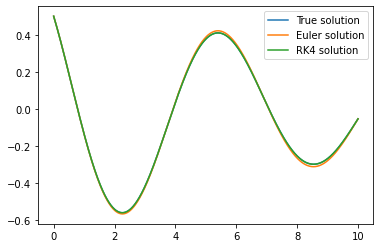

In [4]:
plt.plot(time,True_sol.real,label = 'True solution')
plt.plot(time,Euler_sol.real,label = 'Euler solution')
plt.plot(time,RK4_sol.real,label = 'RK4 solution')
plt.legend()

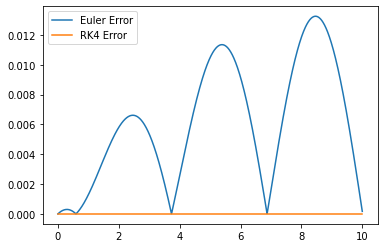

In [5]:
plt.plot(time,np.abs(True_sol.real-Euler_sol.real),label = 'Euler Error')
plt.plot(time,np.abs(True_sol.real-RK4_sol.real),label = 'RK4 Error')
plt.legend()

# Let us use a larger integration time step and see what happens 

In [6]:
# generating training data
w = -0.1+1.0j
x0 = 0.5+0.5j
dt_integration =1.0
T0 = 0
Tf = 10
time = np.arange(0,Tf+0.000001,dt_integration)

True_sol = []
for i in range(len(time)):
    True_sol.append(x0*np.exp(w*T0)*np.exp(w*time[i]))
True_sol = np.array(True_sol)

Euler_sol = [x0]
for i in range(1,len(time)):
    Euler_sol.append(Euler(time[i],Euler_sol[-1],dt_integration,LinearEQ,w))
Euler_sol = np.array(Euler_sol)

RK4_sol = [x0]
for i in range(1,len(time)):
    RK4_sol.append(RK4(time[i],RK4_sol[-1],dt_integration,LinearEQ,w))
RK4_sol = np.array(RK4_sol)

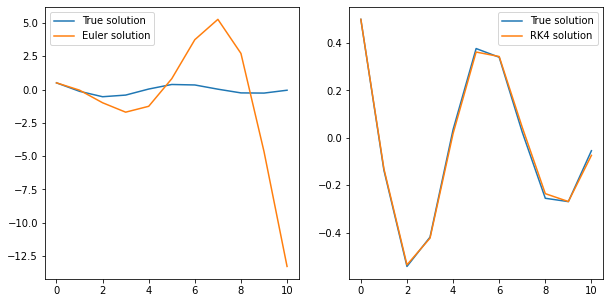

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.plot(time,True_sol.real,label = 'True solution')
ax1.plot(time,Euler_sol.real,label = 'Euler solution')
ax1.legend()
ax2.plot(time,True_sol.real,label = 'True solution')
ax2.plot(time,RK4_sol.real,label = 'RK4 solution')
ax2.legend()

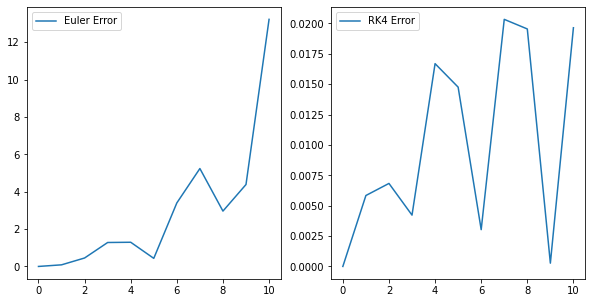

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.plot(time,np.abs(True_sol.real-Euler_sol.real),label = 'Euler Error')
ax1.legend()
ax2.plot(time,np.abs(True_sol.real-RK4_sol.real),label = 'RK4 Error')
ax2.legend()


# Stability regions of Euler and Runge-Kutta 4

In [9]:
rz = np.arange(-10,10+0.000001,0.01)
iz = np.arange(-10,10+0.000001,0.01)
rz, iz = np.meshgrid(rz,iz)
z  = rz+iz*1.j

In [10]:
GE = np.zeros_like(z)*np.nan
list_gE = []
list_xE = []
list_yE = []
for i in tqdm(range(z.shape[0])):
    for j in range(z.shape[1]):
        tmp = np.abs(1+z[i,j])
        if tmp<=1:
            GE[i,j] = tmp
            list_gE.append(GE[i,j].real)
            list_xE.append(z[i,j].real)
            list_yE.append(z[i,j].imag)

100%|██████████| 2001/2001 [00:11<00:00, 168.38it/s]


In [11]:
GRK4 = np.zeros_like(z)*np.nan
ark4 = np.array([[0,0,0,0],[1/2,0,0,0],[0,1/2,0,0],[0,0,1,0]])
brk4 = np.array([1/6,1/3,1/3,1/6])

list_gRK4 = []
list_xRK4 = []
list_yRK4 = []
for i in tqdm(range(z.shape[0])):
    for j in range(z.shape[1]):
        tmp = np.abs(1+z[i,j]*np.dot(np.dot(brk4.T,np.linalg.inv(np.eye(ark4.shape[0])-z[i,j]*ark4)),np.ones_like(brk4)))
        if tmp<=1:
            GRK4[i,j] = tmp
            list_gRK4.append(GRK4[i,j].real)
            list_xRK4.append(z[i,j].real)
            list_yRK4.append(z[i,j].imag)

100%|██████████| 2001/2001 [03:53<00:00,  8.55it/s]


Text(0, 0.5, '$Imag(h\\lambda)$')

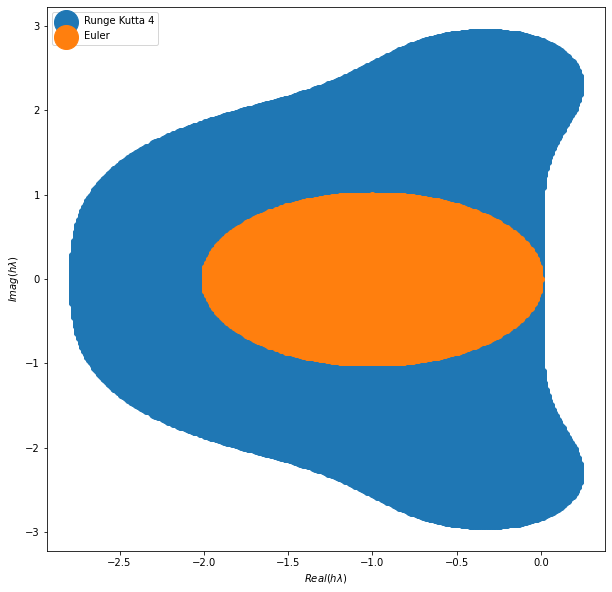

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(list_xRK4),np.array(list_yRK4), label = 'Runge Kutta 4')
plt.scatter(np.array(list_xE),np.array(list_yE), label = 'Euler')
plt.legend(markerscale=4.)
plt.xlabel('$Real(h\lambda)$')
plt.ylabel('$Imag(h\lambda)$')

In [13]:
GE_implicit = np.zeros_like(z)*np.nan
list_gE_implicit = []
list_xE_implicit = []
list_yE_implicit = []
for i in tqdm(range(z.shape[0])):
    for j in range(z.shape[1]):
        tmp = #...code something :)
        if tmp<=1:
            GE_implicit[i,j] = tmp
            list_gE_implicit.append(GE[i,j].real)
            list_xE_implicit.append(z[i,j].real)
            list_yE_implicit.append(z[i,j].imag)

100%|██████████| 2001/2001 [00:20<00:00, 97.47it/s]


Text(0, 0.5, '$Imag(h\\lambda)$')

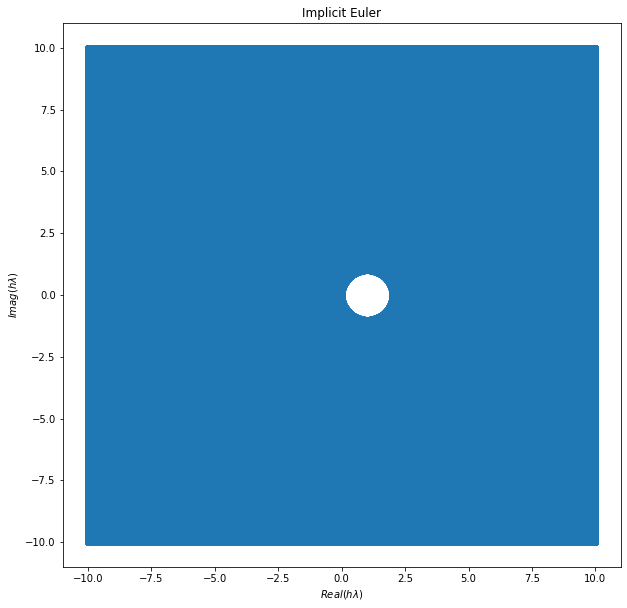

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(list_xE_implicit),np.array(list_yE_implicit))
plt.title('Implicit Euler')
plt.xlabel('$Real(h\lambda)$')
plt.ylabel('$Imag(h\lambda)$')